Considere una variable aleatoria  X  $\in \{-1, +3\}$  con probabilidades a priori  $P_X(-1) = 0.4$  y  $P_X (+3) = 0.6$  . Dada una observación  y  de la variable aleatoria  Y = X+N , donde  N  es una variable aleatoria gaussiana de media   $\mu =0$   con varianza   $\sigma^2 = 0.4$  , independiente de  X , 

encuentre el nivel de decisión para un detector MAP.
Calcule analíticamente la probabilidad de error   $P_e .$

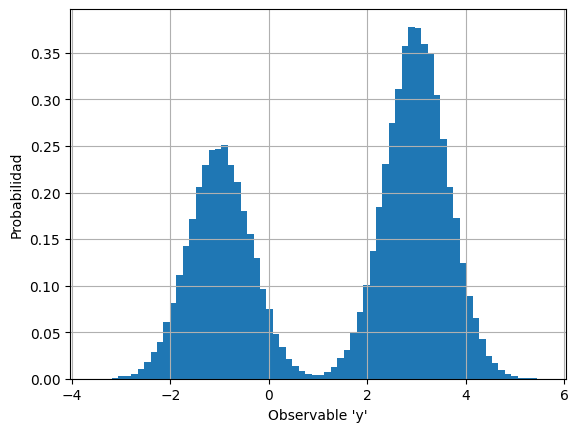

In [3]:
import matplotlib.pyplot as plt
import numpy as np

intentos = 100000

Z = np.random.randint(1,101,intentos)
X = [-1 if Z[n] <= 40 else 3 for n in range(len(Z))]
N = np.random.normal(0,np.sqrt(0.4),intentos)

Y = [N[n]+X[n] for n in range(len(N))]
plt.hist(Y,density=True,bins = 70)
plt.grid()
plt.xlabel("Observable 'y'")
plt.ylabel("Probabilidad")
plt.show()

Se observa que el nivel de decisión es '1'. Entonces, para calcular la probabilidad de error, hacemos:
+ Para m = 3\
    $\frac{1}{\sqrt{2*\pi}}*\int_{-\infty}^X e^\frac{-\zeta^2}{2} d\zeta$. Donde X = $\frac{x-m}{\sigma}$, que se reemplaza por x = umbral, m = 3 y $\sigma = \sqrt{0.4}$\
    Entonces $P_e(3) = $ $\frac{1}{\sqrt{2*\pi}}*\int_{-\infty}^{\frac{-2}{\sqrt{0.4}}} e^\frac{-\zeta^2}{2} d\zeta = 0.00078$

+ Para m = -1\
    $\frac{1}{\sqrt{2*\pi}}*\int_{X}^\infty e^\frac{-\zeta^2}{2} d\zeta$. Donde X = $\frac{x-m}{\sigma}$, que se reemplaza por x = umbral, m = -1 y $\sigma = \sqrt{0.4}$\
    Entonces $P_e(-1) = $ $\frac{1}{\sqrt{2*\pi}}*\int_{\frac{2}{\sqrt{0.4}}}^{\infty} e^\frac{-\zeta^2}{2} d\zeta = 0.00078$

+ Al final, $P_e = P_e(-1)*P(-1)+P_e(3)*P(3) = 0.00078*0.4 + 0.00078*0.6 = 0.00078$


In [4]:
umbral = 1
Y_Decodificada = [-1 if Y[n] < umbral else 3 for n in range(len(Y))]

correctos = 0
for n in range(len(Y_Decodificada)):
    if(Y_Decodificada[n] == X[n]):
        correctos += 1

Pe = 1-correctos/intentos
print(Pe)

0.0007399999999999629
